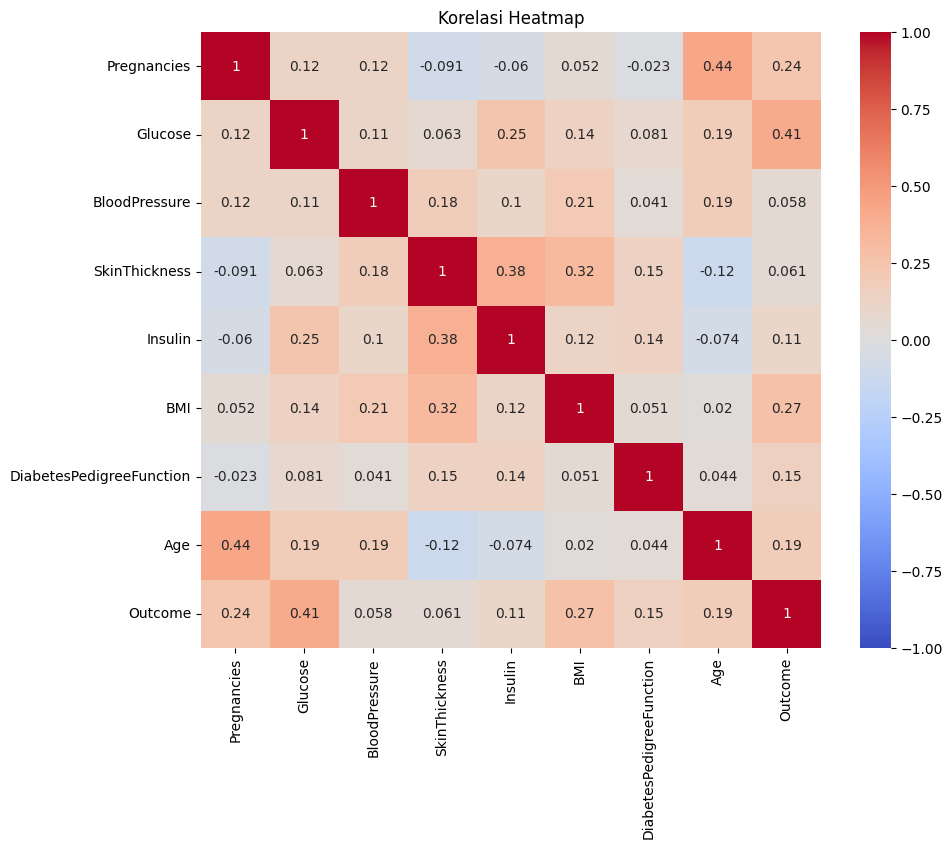

bentuk asli data: (768, 9)
bentuk data setelah resampling: (536, 9)
beberapa baris dari data yg di scalling robust:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.439363 -0.523758       1.753393       0.484848 -0.732176  0.000000   
1    -0.760637  0.384043       0.000000      -0.090909  0.000000  0.000000   
2     0.000000  0.213830       0.000000      -0.181818  1.010681  0.000000   
3    -0.760637 -0.552127       0.000000      -0.696970 -0.732176  0.823627   
4     0.439363 -0.779077      -1.579940       0.212121  0.000000 -0.731929   

   DiabetesPedigreeFunction       Age  
0                  0.626181 -0.421724  
1                 -0.242915 -0.993153  
2                 -0.882591 -0.911520  
3                 -0.658570 -0.584990  
4                 -0.232119  0.000000  
beberapa baris dari data yg di scalling minmax:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.512563       0.789474       0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

# akses data diabetes
data = pd.read_csv('/content/diabetes.csv')

# 1. imputasi missing values

# mean
imputasi_mean = SimpleImputer(strategy='mean')
data_mean_imputasi = pd.DataFrame(imputasi_mean.fit_transform(data), columns=data.columns)

# median
imputasi_median = SimpleImputer(strategy='median')
data_median_imputasi = pd.DataFrame(imputasi_median.fit_transform(data), columns=data.columns)

# modus
imputasi_modus = SimpleImputer(strategy='most_frequent')
data_modus_imputasi = pd.DataFrame(imputasi_modus.fit_transform(data), columns=data.columns)

# menggunakan data hasil imputasi mean untuk analisis dan visualisasi
data_imputasi = data_mean_imputasi.copy()

# 2. cek korelasi dgn heatmap
plt.figure(figsize=(10, 8))
corr = data_imputasi.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Heatmap')
plt.show()

# 3. imbalance handling dgn undersampling
# misal targetnya kolom Outcome
X = data_imputasi.drop('Outcome', axis=1)
y = data_imputasi['Outcome']

undersample = RandomUnderSampler(sampling_strategy='auto')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# menyatukan data resampled
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)

# 4. scaling
# scalling dgn Robust
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_resampled)

# scalling dgn Min-Max
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X_resampled)

# ubah DataFrame
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# print hasil penjelas
print("bentuk asli data:", data.shape)
print("bentuk data setelah resampling:", data_resampled.shape)
print("beberapa baris dari data yg di scalling robust:\n", X_robust_scaled_df.head())
print("beberapa baris dari data yg di scalling minmax:\n", X_minmax_scaled_df.head())
